In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('auto-mpg.data', delimiter='\s+', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Name']) # importing our data

df = pd.DataFrame(data) # turning data into pandas dataframe

We make our Model Year as the x-axis because it has a natural ordering, therefore making it ideal for the x-axis

In [4]:
x = df['Model Year'] # Defining x and y axes
y = df['MPG']

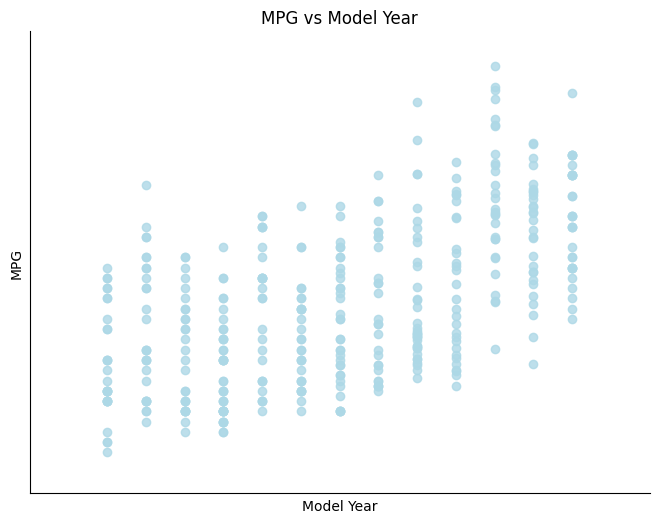

In [5]:

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.scatter(x,y,c='lightblue',alpha=.8) # creates our plot with x and y as our axes and defines our color

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # Gets current axes

ax.set_xlabel('Model Year') # Gives our axes a label
ax.set_ylabel('MPG')

plt.title('MPG vs Model Year')

plt.show()

We can see in the graph there seems to be a slight positive trend



<br>
We will now do additional correlation analysis

In [6]:
corr = x.corr(y,method='pearson') # Calculating a correlation coefficient
print(corr)

0.5792671330833096


We have a moderate positive correlation which indicates a linear relationship between our variables



<br>
We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate

In [7]:
lm = LinearRegression() # creating object

fittedX = x.values.reshape(-1,1) # Reshaping so we can put in our fit function
fittedY = y.values

lm.fit(fittedX,fittedY) # fit our data

predicted_y = lm.predict(fittedX) # makes a y prediction for every x value


We now are using our graph from before and adding our linear regression line

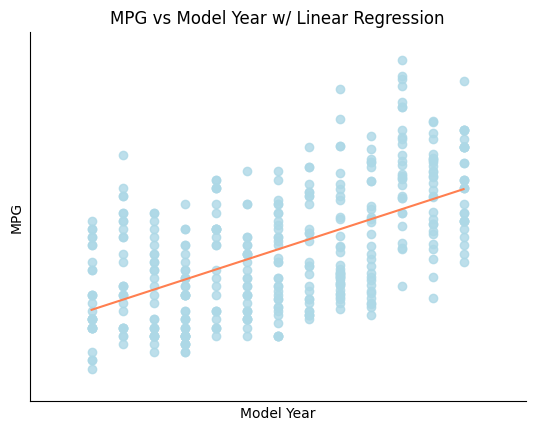

In [8]:

plt.scatter(x,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # get current axes

ax.set_xlabel('Model Year') # Gives our axes a label
ax.set_ylabel('MPG')

plt.title('MPG vs Model Year w/ Linear Regression') # gives a plot title

plt.plot(fittedX, predicted_y,c='coral') # add the linear regression line

Analysis for our prediction (Not sure if needed or what methods we will use)


In [10]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['MPG'][(y < lower) | (y > upper)] # search for outliers
print(outliers)

322    46.6
Name: MPG, dtype: float64


We have only one relatively small outlier in our dataset which shouldn't be responsible for our innacuracy 


<br>
We will investigate further methods

-0.3065643342832895


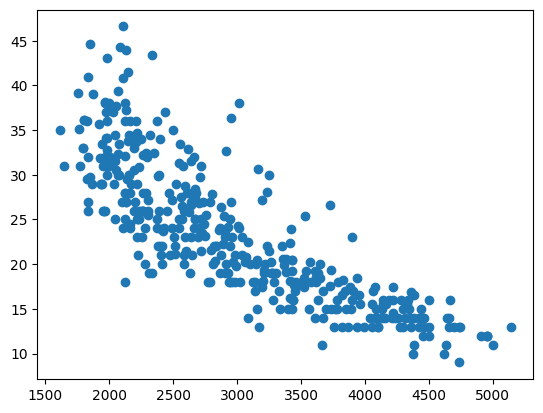

In [49]:
weight = df['Weight']

weightCorr = weight.corr(x,method='pearson')
print(weightCorr)

plt.scatter(weight,y)

-14.197981575720995


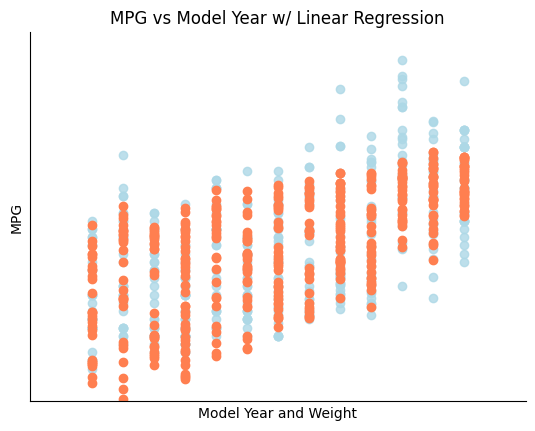

In [72]:
multiple_x = df[['Model Year', 'Weight']].values

multiLM = LinearRegression()

multiLM.fit(multiple_x,y)
print(multiLM.intercept_)

multiY_pred = multiLM.predict(multiple_x)

plt.scatter(x,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # get current axes

ax.set_xlabel('Model Year and Weight') # Gives our axes a label
ax.set_ylabel('MPG')

plt.title('MPG vs Model Year w/ Linear Regression') # gives a plot title

plt.scatter(fittedX, multiY_pred,c='coral') # add the linear regression line

In [71]:


r2 = r2_score(y,predicted_y)
print(r2)

multi_r2 = r2_score(y,multiY_pred)
print(multi_r2)



0.33555041147055686
0.8078621345742751
